In [1]:
import pandas as pd
import numpy as np
import torch as tr
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('.\\dataset5\\data.csv')
df.head()

images_id label
0    real_1  real
1   real_10  real
2  real_100  real
3  real_101  real
4  real_102  real

In [3]:
from PIL import Image
from IPython.display import display

real_path = ".\\dataset5\\real\\"
fake_path = ".\\dataset5\\fake\\"
X = []
y = []
for i in df.loc[:,'images_id'].to_numpy():
    if i.startswith('real'):
        #X.append(cv2.imread(real_path+i+".jpg"))
        X.append(Image.open(real_path+i+".jpg"))
        y.append(0)
    elif i.startswith('fake'):
        #X.append(cv2.imread(fake_path+i+".jpg"))
        X.append(Image.open(fake_path+i+".jpg"))
        y.append(1)
    else:
        print('unknown file class:',i)
    #print(np.asarray(X).shape)
#X.append(cv2.imread(real_path+"real_1.jpg"))
#print(np.asarray(X).shape)
#X.append(cv2.imread(real_path+"real_2.jpg"))
#print(np.asarray(X).shape)
print(len(X))
print(len(y))

1289
1289


In [4]:
degree_step = 2 #for iteration RandomRotation for data augmentation in future

transform = transforms.Compose([
    transforms.Resize((128,128))
    #if int -> smaller edge match to that int
    ,
    transforms.RandomRotation(degrees=0),
    transforms.ToTensor()
])
first_transformed = transform(X[0])
print('first transformed shape:',first_transformed.shape)
#plt.imshow(first_transformed) # CRASH !

first transformed shape: torch.Size([3, 128, 128])


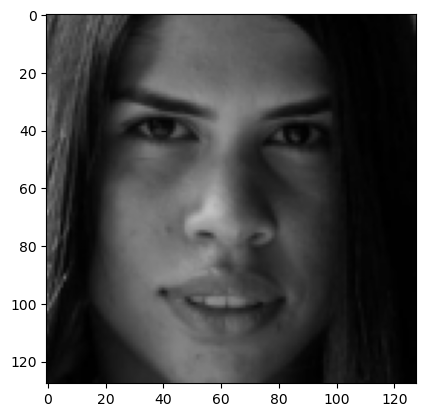

In [5]:
#matplotlib wants this format: (128,64,3)
#(1,2,0) means first dim must be second last dim, second dim must be third dim, third dim must be first dim
#if we have and array with shape (a,b,c,d,...)
#(a',b',c',d',...) means new_shape[position(a)] = last_shape[position(a)(a')]
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = "TRUE"
plt.imshow(np.transpose(first_transformed.numpy(),(1,2,0)))

In [6]:
first_transformed[0,0]
#pytorch do image / 255 normalization

tensor([0.3725, 0.3294, 0.3608, 0.1843, 0.3020, 0.4275, 0.3686, 0.3961, 0.3373,
        0.3765, 0.3373, 0.3137, 0.2863, 0.2431, 0.3373, 0.3647, 0.3216, 0.2706,
        0.3608, 0.2235, 0.3490, 0.3255, 0.3569, 0.3137, 0.2471, 0.2784, 0.1725,
        0.2549, 0.2118, 0.0745, 0.0275, 0.0314, 0.0314, 0.0549, 0.0863, 0.1098,
        0.1294, 0.1529, 0.1765, 0.2118, 0.2667, 0.3176, 0.3647, 0.3765, 0.3922,
        0.4196, 0.4431, 0.4510, 0.4275, 0.4157, 0.4078, 0.4118, 0.4078, 0.4039,
        0.3922, 0.4039, 0.4000, 0.3922, 0.3804, 0.3922, 0.3922, 0.3922, 0.3804,
        0.3804, 0.3647, 0.3373, 0.3490, 0.3451, 0.3333, 0.3294, 0.3176, 0.3137,
        0.3176, 0.3216, 0.3059, 0.2863, 0.2667, 0.2588, 0.2314, 0.2431, 0.2118,
        0.1451, 0.0824, 0.0510, 0.0314, 0.0196, 0.0157, 0.0196, 0.0235, 0.0235,
        0.0235, 0.0235, 0.0431, 0.0471, 0.0078, 0.0078, 0.0157, 0.0196, 0.0078,
        0.0039, 0.0078, 0.0118, 0.0078, 0.0078, 0.0078, 0.0078, 0.0118, 0.0118,
        0.0118, 0.0118, 0.0157, 0.0078, 

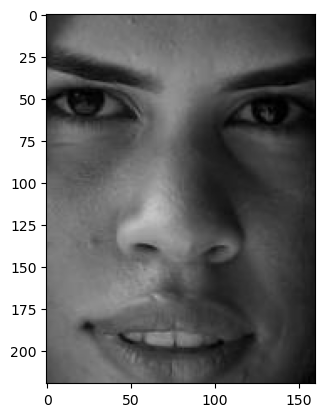

In [7]:
transform = transforms.Compose([
    transforms.CenterCrop((220,160)),
    transforms.RandomRotation(degrees=0),
    transforms.ToTensor()
])
first_transformed = transform(X[0])
plt.imshow(np.transpose(first_transformed.numpy(),(1,2,0)))

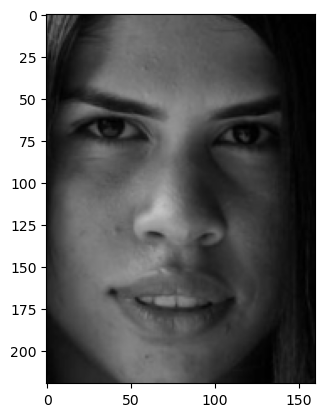

In [8]:
transform = transforms.Compose([
    transforms.Resize(220),
    transforms.CenterCrop((220,160)),
    transforms.RandomRotation(degrees=0),
    transforms.ToTensor()
])
first_transformed = transform(X[0])
plt.imshow(np.transpose(first_transformed.numpy(),(1,2,0)))

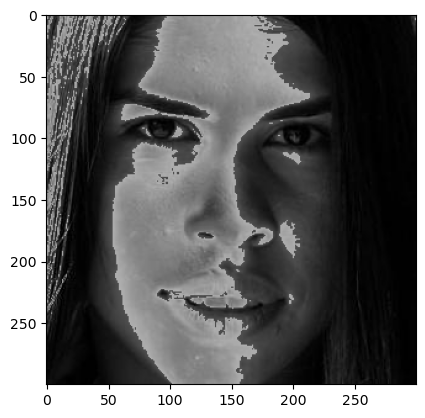

In [9]:
transform = transforms.Compose([
    #transforms.RandomHorizontalFlip(p=1.0),
    #transforms.RandomCrop(size=(200,200)),
    #transforms.RandomPerspective(distortion_scale=0.6,p=1.0),
    #transforms.RandomPosterize(bits=3,p=1.0),
    transforms.RandomSolarize(threshold=80,p=1.0), #invert if equal or above threshold
    transforms.ToTensor()
])
first_transformed = transform(X[0])
plt.imshow(np.transpose(first_transformed.numpy(),(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


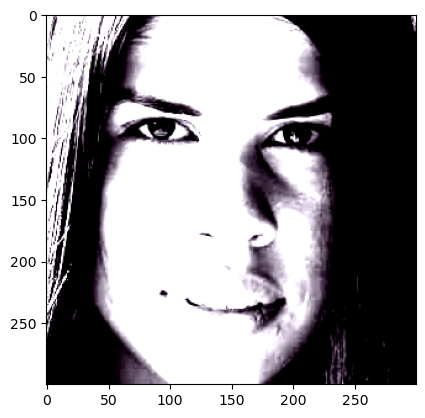

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    transforms.Normalize(mean=[0.1,0.11,0.1],std=[0.129,0.124,0.125])
])
first_transformed = transform(X[0])
plt.imshow(np.transpose(first_transformed.numpy(),(1,2,0)))

In [11]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])
X_list = [transform(img) for img in X]  # هر img با shape (3,128,128)
Xtensor = tr.stack(X_list)  # shape: [1289, 3, 128, 128]
print(Xtensor.shape)
# ساخت ytensor
ytensor = tr.tensor(y, dtype=tr.long) 
print(ytensor.shape)

torch.Size([1289, 3, 128, 128])
torch.Size([1289])


In [12]:
class CNN(tr.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = tr.nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1)
        self.conv2 = tr.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1)
        self.conv3 = tr.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.conv4 = tr.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.fc1 = tr.nn.Linear(in_features=6*6*64, out_features=32)
        self.fc2 = tr.nn.Linear(in_features=32, out_features=64)
        self.fc3 = tr.nn.Linear(in_features=64, out_features=2)
        self.dropout = tr.nn.Dropout(p=0.6)

    def forward(self, X):
        X = self.conv1(X)
        X = tr.nn.functional.relu(X)
        X = tr.nn.functional.max_pool2d(X,kernel_size=2,stride=2)
        X = self.conv2(X)
        X = tr.nn.functional.relu(X)
        X = tr.nn.functional.max_pool2d(X,kernel_size=2,stride=2)
        X = self.conv3(X)
        X = tr.nn.functional.relu(X)
        X = tr.nn.functional.max_pool2d(X,kernel_size=2,stride=2)
        X = self.conv4(X)
        X = tr.nn.functional.relu(X)
        X = tr.nn.functional.max_pool2d(X,kernel_size=2,stride=2)
        #128*128 --conv1--> 126*126 --maxp--> 63*63 --conv2--> 61*61 --maxp--> 31*31 
        #--conv3--> 29*29 --maxp--> 14*14 --conv4--> 12*12 --maxp--> 6*6
        X = X.view(-1,6*6*64)
        X = tr.nn.functional.relu(self.fc1(X))
        X = self.dropout(X)
        X = tr.nn.functional.relu(self.fc2(X))
        X = self.fc3(X)
        return X


In [13]:
model = CNN()

In [14]:
class_counts = tr.bincount(ytensor)  # tensor([589, 700])
weights = 1.0 / class_counts.float()
print("Weights for loss:", weights)
loss_f = tr.nn.CrossEntropyLoss(weight=weights)
optimizer = tr.optim.Adamax(model.parameters(), lr=0.00003, weight_decay=1e-4)

Weights for loss: tensor([0.0017, 0.0014])


In [15]:
sum = 0
for param in model.parameters():
    print(param.numel())
    sum+=param.numel()
print('sum of all parameters:',sum)

216
8
1152
16
4608
32
18432
64
73728
32
2048
64
128
2
sum of all parameters: 100530


In [16]:
from sklearn.model_selection import train_test_split
# شافل کردن داده‌ها
perm = tr.randperm(Xtensor.size(0))
Xtensor = Xtensor[perm]
ytensor = ytensor[perm].long()
X_train, X_val, y_train, y_val = train_test_split(Xtensor, ytensor, test_size=0.2, random_state=42)

print("Train:", X_train.shape, "Validation:", X_val.shape)

Train: torch.Size([1031, 3, 128, 128]) Validation: torch.Size([258, 3, 128, 128])


In [17]:
import time
start_time = time.time()

# بررسی کلاس‌ها
print("Classes:", tr.unique(ytensor), "Counts:", tr.bincount(ytensor))

# وزن‌دهی برای مقابله با عدم توازن
class_counts = tr.bincount(ytensor)
weights = 1.0 / class_counts.float()
loss_f = tr.nn.CrossEntropyLoss(weight=weights)

# مقداردهی اولیه وزن‌ها
def init_weights(m):
    if isinstance(m, tr.nn.Conv2d) or isinstance(m, tr.nn.Linear):
        tr.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            tr.nn.init.zeros_(m.bias)

model.apply(init_weights)

# تابع Accuracy
def AccuracyEvaluation():
    model.eval()
    with tr.no_grad():
        y_pred = model(X_val)
        preds = tr.argmax(y_pred, dim=1)
        correct = (preds == y_val).sum().item()
        acc = correct / len(y_val)
        print('Accuracy:', acc, "Predicted unique:", tr.unique(preds))
    model.train()

# حلقه آموزش
epochs = 15
batch_size = 8
for e in range(epochs):
    EpochLossSum = 0.0
    for i in range(0, X_train.size(0), batch_size):
        xb = X_train[i:i+batch_size]
        yb = y_train[i:i+batch_size]

        y_pred = model(xb)
        loss = loss_f(y_pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        EpochLossSum += loss.item()

    avg_loss = EpochLossSum / (len(X_train) / batch_size)
    print(f"Epoch {e+1}/{epochs}, Loss: {avg_loss:.4f}")
    AccuracyEvaluation()

print('times elapsed:',time.time()-start_time)

Classes: tensor([0, 1]) Counts: tensor([589, 700])
Epoch 1/15, Loss: 0.6936
Accuracy: 0.4689922480620155 Predicted unique: tensor([0, 1])
Epoch 2/15, Loss: 0.6923
Accuracy: 0.6356589147286822 Predicted unique: tensor([0, 1])
Epoch 3/15, Loss: 0.6881
Accuracy: 0.7945736434108527 Predicted unique: tensor([0, 1])
Epoch 4/15, Loss: 0.6877
Accuracy: 0.8604651162790697 Predicted unique: tensor([0, 1])
Epoch 5/15, Loss: 0.6835
Accuracy: 0.8992248062015504 Predicted unique: tensor([0, 1])
Epoch 6/15, Loss: 0.6805
Accuracy: 0.8992248062015504 Predicted unique: tensor([0, 1])
Epoch 7/15, Loss: 0.6753
Accuracy: 0.9457364341085271 Predicted unique: tensor([0, 1])
Epoch 8/15, Loss: 0.6732
Accuracy: 0.9689922480620154 Predicted unique: tensor([0, 1])
Epoch 9/15, Loss: 0.6652
Accuracy: 0.9767441860465116 Predicted unique: tensor([0, 1])
Epoch 10/15, Loss: 0.6588
Accuracy: 0.9689922480620154 Predicted unique: tensor([0, 1])
Epoch 11/15, Loss: 0.6503
Accuracy: 0.9767441860465116 Predicted unique: tenso

In [18]:
import time
start_time = time.time()

model2 = CNN()
optimizer2 = tr.optim.Adamax(model2.parameters(), lr=0.00007, weight_decay=1e-4)

losses = []
epochs = 10
"""for e in range(epochs):
    EpochLossSum = 0
    for i in range(Xtensor.size()[0]):
        y_pred = model2(Xtensor[i].unsqueeze(0))
        loss = loss_f(y_pred,ytensor[i].unsqueeze(0))
        EpochLossSum += loss.item()
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
    losses.append(EpochLossSum/Xtensor.size()[0])
    print('epoch',e,'completed, loss',EpochLossSum/Xtensor.size()[0])"""
for e in range(epochs):
    EpochLossSum = 0
    for i in range(X_train.size()[0]):
        y_pred = model2(X_train[i].unsqueeze(0))
        loss = loss_f(y_pred,y_train[i].unsqueeze(0))
        EpochLossSum += loss.item()
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
    losses.append(EpochLossSum/X_train.size()[0])
    print('epoch',e,'completed, loss',EpochLossSum/X_train.size()[0])
print('times elapsed:',time.time()-start_time)

epoch 0 completed, loss 0.6893132430737049
epoch 1 completed, loss 0.6861786737127517
epoch 2 completed, loss 0.6654341963456744
epoch 3 completed, loss 0.5896012167203323
epoch 4 completed, loss 0.43553077840949944
epoch 5 completed, loss 0.3206611495225886
epoch 6 completed, loss 0.25935509149740266
epoch 7 completed, loss 0.20215650406834498
epoch 8 completed, loss 0.16559185861333883
epoch 9 completed, loss 0.1499289651462434
times elapsed: 62.16523504257202


In [39]:
model.eval()
with tr.no_grad():
    val_outputs = model2(X_val)
    val_preds = tr.argmax(val_outputs, dim=1)
    correct = (val_preds == y_val).sum().item()
    val_acc = correct / len(y_val)
    print("Validation Accuracy:", val_acc)
model.train()


Validation Accuracy: 0.9922480620155039


CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
)

In [20]:
model.eval()
model2.eval()

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
)

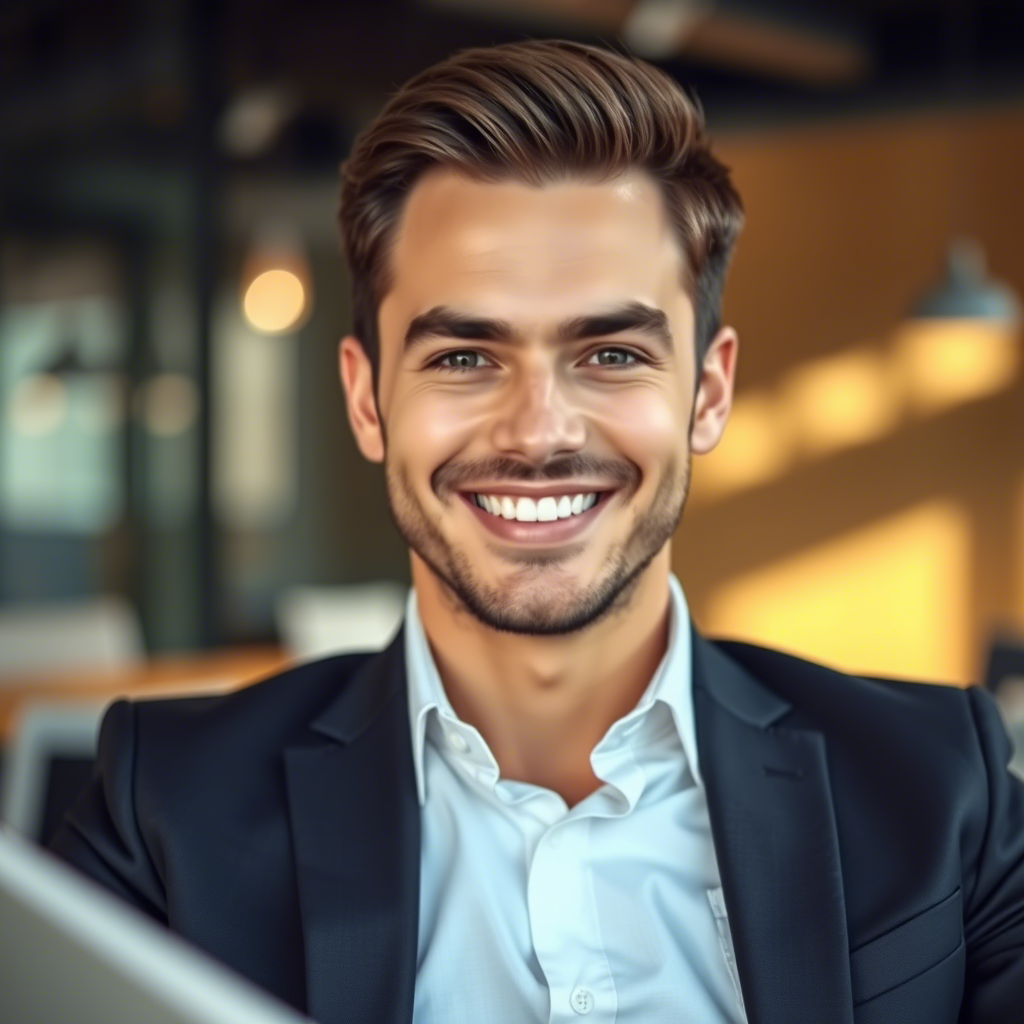

In [21]:
myimg = Image.open('Real_or_fake_test.png')
myimg

In [22]:
myimg_transformed = transform(myimg)
myimg_transformed.shape

torch.Size([3, 128, 128])

In [23]:
y_myimg = model(myimg_transformed.view(1,3,128,128))
print(tr.argmax(y_myimg))
y_myimg = model2(myimg_transformed.view(1,3,128,128))
print(tr.argmax(y_myimg))

tensor(1)
tensor(1)


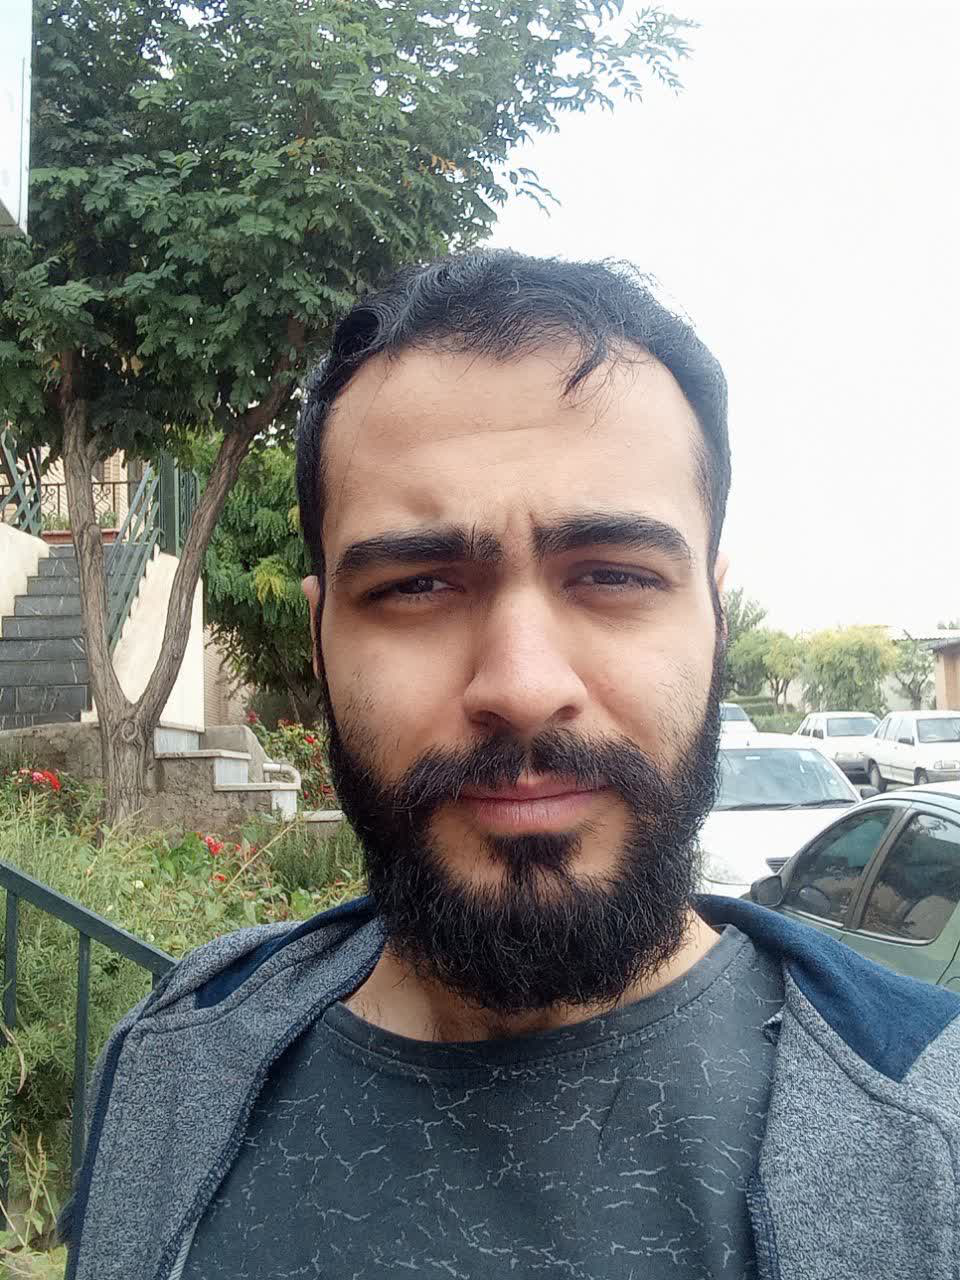

In [24]:
myimg2 = Image.open('Real_or_fake_test2.jpg')
myimg2

In [25]:
myimg2_transformed = transform(myimg2)
y_myimg2 = model(myimg2_transformed.view(1,3,128,128))
print(tr.argmax(y_myimg2))
y_myimg2 = model2(myimg2_transformed.view(1,3,128,128))
print(tr.argmax(y_myimg2))

tensor(1)
tensor(0)


In [26]:
tr.save(model.state_dict(),'70_real_images_1(ai generated code).pt')
tr.save(model2.state_dict(),'70_real_images_2(my model).pt')

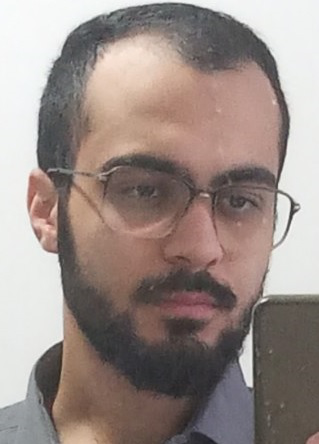

In [29]:
Image.open('Real_or_fake_test3.jpg')

In [36]:
print(tr.argmax(model2(transform(Image.open('Real_or_fake_test3.jpg')).view(1,3,128,128))))

tensor(0)


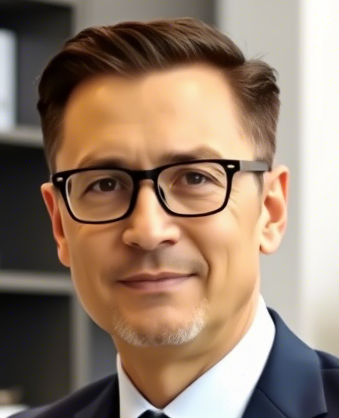

In [40]:
Image.open('Real_or_fake_test4.jpg')

In [43]:
print(tr.argmax(model2(transform(Image.open('Real_or_fake_test4.jpg')).view(1,3,128,128))))

tensor(1)
